# GAMMA RAY LOG TRANSFORMATION
Transforming Gamma Ray Log to Vshale and Vclay log and visualize the data

1. **Calculating IGR**

IGR = (GR read-GR min) / (GR max - GR min)

2. **Converting GR to VCL**

VCL = (GR read-GR min) / (VCL max - GR min) where VCL max can be taken from literature

3. **Converting VCL to Vsh**

VCl<0.12 means VSh = 0 | 0.12<VCL<0.3 means VSh = VCL | VCL>0.3 means VSh = 1


In [1]:
#import library needed
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
#import data and change directory
dir='D:/Kuliah/Python/logs.txt'
well=pd.read_csv(dir,sep='\t')
well.head()

,depth,dens,GR,Vp,Vs
0,880.00,2.5072,71.8898,2984.2212,1368.8657
1,880.25,2.4996,73.0446,3017.5068,1390.9037
2,880.50,2.4946,77.9084,3110.6470,1426.4586
3,880.75,2.4928,79.5323,3140.1648,1468.8558
4,881.00,2.5199,82.8057,3160.2432,1516.1896


Text(0.5, 0, 'poro')

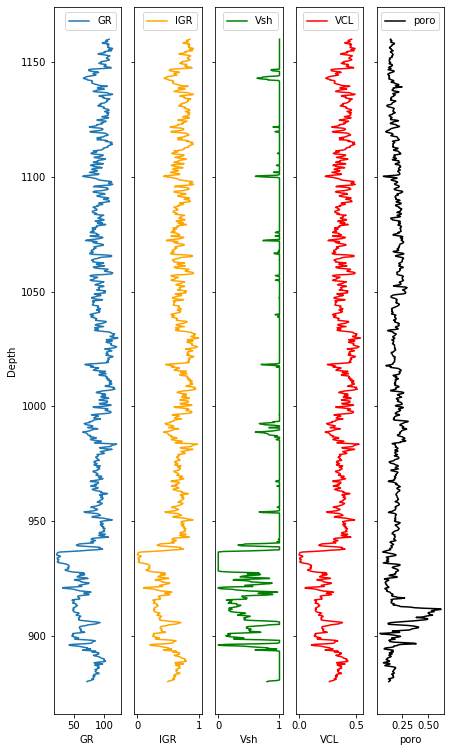

In [143]:
#GR transformation
IGR=(well.GR-min(well.GR))/(max(well.GR)-min(well.GR))
VCL=(well.GR-min(well.GR))/(210-min(well.GR))

##scatter template
template = {'alpha':0.8,'edgecolor':'k','linewidth':0.3,'cmap':'jet'}
f,ax=plt.subplots(1,5,figsize=(7,13),sharey=True)

ax[0].plot(well.GR,well.depth,label='GR')
ax[0].legend()
ax[0].set_xlabel('GR')
ax[0].set_ylabel('Depth')


ax[1].plot(IGR,well.depth,label='IGR',c='orange')
ax[1].legend()
ax[1].set_xlabel('IGR')


ax[2].plot(well.vsh,well.depth,label='Vsh',c='g')
ax[2].legend()
ax[2].set_xlabel('Vsh')


ax[3].plot(VCL,well.depth,label='VCL',c='r')
ax[3].legend()
ax[3].set_xlabel('VCL')

ax[4].plot(por,well.depth,label='poro',c='black')
ax[4].legend()
ax[4].set_xlabel('poro')


In [139]:
#adding new column in data
well = well.assign(IGR=IGR)
well = well.assign(VCL=VCL)
well = well.assign(por=por)


well.head()

,depth,dens,GR,Vp,Vs,IGR,VCL,vsh,por,vpc,vsc
0,880.00,2.5072,71.8898,2984.2212,1368.8657,0.496799,0.266106,0.795546,0.121286,4079.392830,2489.652815
1,880.25,2.4996,73.0446,3017.5068,1390.9037,0.508255,0.272242,0.826440,0.126619,4015.596100,2439.431426
2,880.50,2.4946,77.9084,3110.6470,1426.4586,0.556507,0.298087,0.956557,0.134480,3884.425432,2331.128247
3,880.75,2.4928,79.5323,3140.1648,1468.8558,0.572617,0.306717,1.000000,0.137132,3840.368349,2294.771529
4,881.00,2.5199,82.8057,3160.2432,1516.1896,0.605091,0.324111,1.000000,0.126688,3900.313479,2333.129279


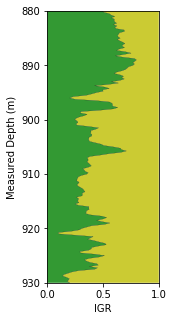

In [144]:
##GR TRANSFORMATION TO MUD LOG
doi=well[(well['depth']>875)&(well['depth']<=930)]
plt.figure(figsize=(2,5))
           
plt.plot(doi['IGR'],doi['depth'],linewidth=0.2,c='k')
plt.fill_betweenx(doi['depth'],doi['IGR'],1,facecolor='y',alpha=0.8)
plt.fill_betweenx(doi['depth'],0,doi['IGR'],facecolor='g',alpha=0.8)
plt.xlim(0,1)
plt.ylim(880,930)
plt.ylabel('Measured Depth (m)')
plt.xlabel('IGR')
plt.gca().invert_yaxis()

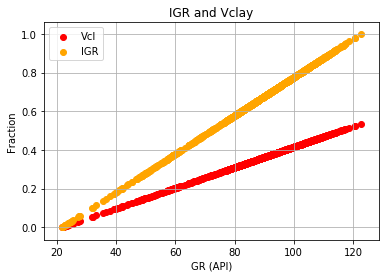

In [134]:
##crossplot GR,VCLAY VSHALE
plt.scatter(well.GR,VCL,c='r')
plt.scatter(well.GR,well.IGR,c='orange')
plt.title('IGR and Vclay')
plt.xlabel('GR (API)')
plt.ylabel('Fraction')
plt.legend(['Vcl','IGR'])
plt.grid()

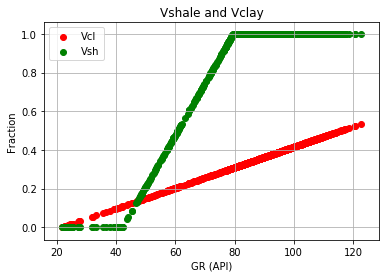

In [135]:
##change vclay<12% and vclay>30%
#litho classification
grmin=well.loc[well['VCL']<=0.12,'GR'].iloc[0]
grmax=well.loc[well['VCL']>0.3,'GR'].iloc[0]
vsh=(well.GR-grmin)/(grmax-grmin)
well=well.assign(vsh=vsh)

well.loc[well.GR<=grmin,'vsh']=0
well.loc[well.GR>=grmax,'vsh']=1

##crossplot GR,VCLAY VSHALE
plt.scatter(well.GR,VCL,c='r')
plt.scatter(well.GR,well.vsh,c='g')
plt.title('Vshale and Vclay')
plt.xlabel('GR (API)')
plt.ylabel('Fraction')
plt.legend(['Vcl','Vsh'])
plt.grid()

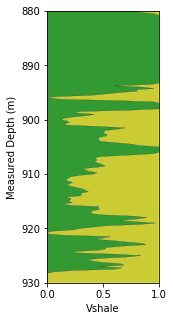

In [104]:
##GR TRANSFORMATION TO MUD LOG
doi=well[(well['depth']>875)&(well['depth']<=930)]
plt.figure(figsize=(2,5))
           
plt.plot(doi['vsh'],doi['depth'],linewidth=0.2,c='k')
plt.fill_betweenx(doi['depth'],doi['vsh'],1,facecolor='y',alpha=0.8)
plt.fill_betweenx(doi['depth'],0,doi['vsh'],facecolor='g',alpha=0.8)
plt.xlim(0,1)
plt.ylim(880,930)
plt.ylabel('Measured Depth (m)')
plt.xlabel('Vshale')
plt.gca().invert_yaxis()

# Lithology Classification

In this part we will divide the lithology become clean sand (cs), shaly sand (ss), and shale (sh) based on the VSh. Castagna model was used to see the predicted Vp and Vs from the model. This model can be used if we have outlier data. 

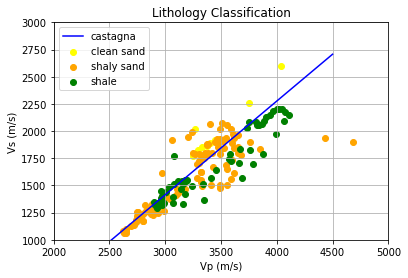

In [133]:
##lithology discrimination
cs=well[(well['dens']>1.8)&(well['vsh']<=0)&(well['depth']>875)&(well['depth']<=930)]
ss=well[(well['dens']>1.8)&(well['vsh']>0)&(well['vsh']<1)&(well['depth']>875)&(well['depth']<=930)]
sh=well[(well['dens']>1.8)&(well['vsh']>=1)&(well['depth']>875)&(well['depth']<=930)]

#adding castagna line
vpc=pd.Series(np.linspace(2000,4500,500))
vsc=0.862*vpc-1172


##plot classification result
plt.scatter(cs['Vp'],cs['Vs'],c='yellow')
plt.scatter(ss['Vp'],ss['Vs'],c='orange')
plt.scatter(sh['Vp'],sh['Vs'],c='g')
plt.plot(vpc,vsc,c='blue')
plt.legend(['castagna','clean sand','shaly sand','shale'])
plt.title('Lithology Classification')
plt.xlabel('Vp (m/s)')
plt.ylabel('Vs (m/s)')
plt.xlim(2000,5000)
plt.ylim(1000,3000)
plt.grid()


In [108]:
#calculating porosity
psh=2.76+0.001*((well.dens-2)-230*np.exp(-4*(well.dens-2)))
pma=2.65*(1-vsh)+psh*vsh
por=(pma-well.dens)/(pma-1.01)

2.6324


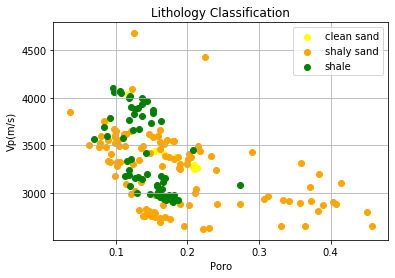

In [136]:
#plot classification result
plt.scatter(cs['por'],cs['Vp'],c='yellow')
plt.scatter(ss['por'],ss['Vp'],c='orange')
plt.scatter(sh['por'],sh['Vp'],c='g')
plt.legend(['clean sand','shaly sand','shale'])
plt.title('Lithology Classification')
plt.xlabel('Poro')
plt.ylabel('Vp(m/s)')
plt.grid()